In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor

In [57]:
car_dataset=pd.read_csv(r'c:\\Users\\mahen\\OneDrive\\Desktop\\car data.csv')

In [58]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [59]:
car_dataset.shape

(301, 9)

In [60]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [61]:
car_dataset['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [62]:
car_dataset['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [63]:
car_dataset['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [64]:
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [65]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [66]:
X=car_dataset.drop(['Selling_Price','Car_Name'],axis=1)
y=car_dataset['Selling_Price']

In [67]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [68]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2)

In [70]:
model=LinearRegression()

In [71]:
model.fit(X_train,y_train)

LinearRegression()

In [72]:
training_data_prediction=model.predict(X_train)

In [73]:
error_score=metrics.r2_score(y_train,training_data_prediction)
print('R squared Error:', error_score)

R squared Error: 0.8799451660493716


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

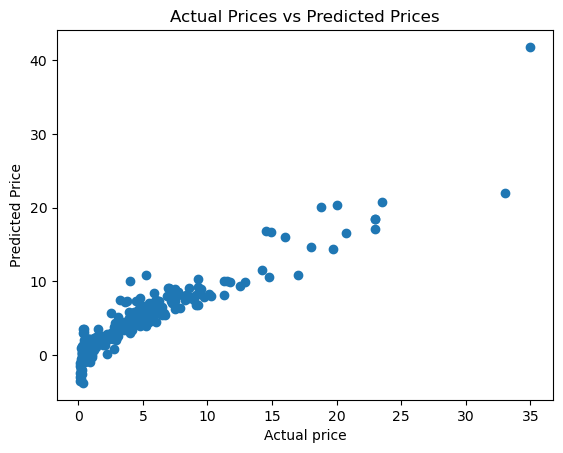

In [74]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')

In [75]:
testing_data_prediction=model.predict(X_test)


In [76]:
error_score=metrics.r2_score(y_test,testing_data_prediction)
print('R squared Error:', error_score)

R squared Error: 0.8365766715027156


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

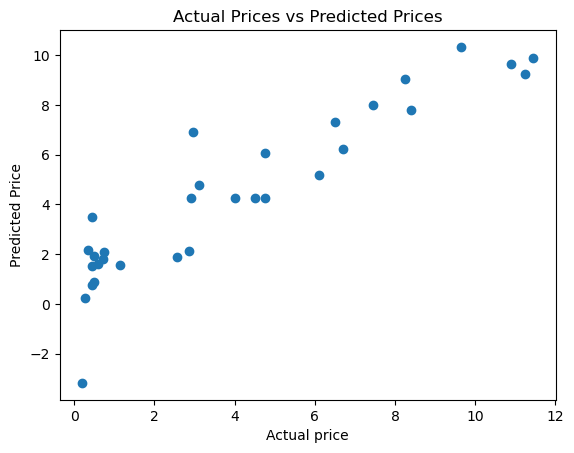

In [77]:
plt.scatter(y_test,testing_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')

Lasso Regression

In [78]:
model2=Lasso()
model2.fit(X_train,y_train)


Lasso()

In [79]:
training_data_prediction=model2.predict(X_train)


In [80]:
error_score=metrics.r2_score(y_train,training_data_prediction)
print('R squared Error:', error_score)


R squared Error: 0.8427856123435794


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

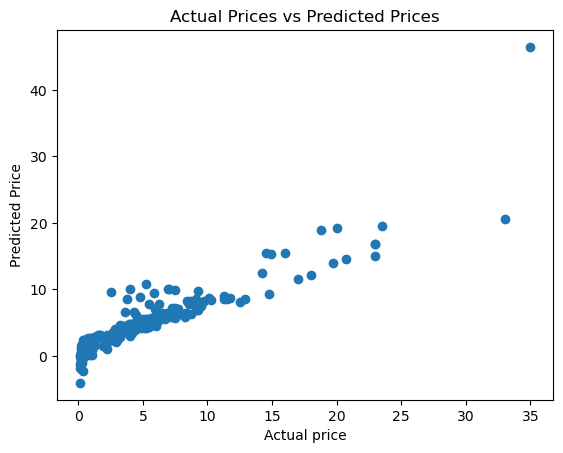

In [81]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')


In [82]:
testing_data_prediction=model2.predict(X_test)


In [83]:
error_score=metrics.r2_score(y_test,testing_data_prediction)
print('R squared Error:', error_score)


R squared Error: 0.8709167941173195


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

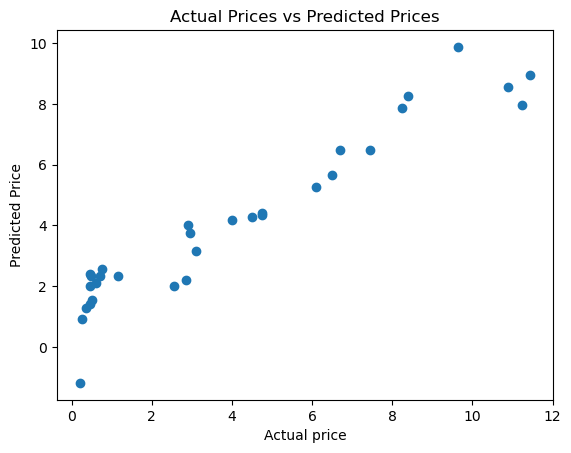

In [84]:
plt.scatter(y_test,testing_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')

In [85]:
'''XGBRegressor'''

'XGBRegressor'

In [86]:
model3=XGBRegressor()

In [87]:
model3.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [88]:
training_data_prediciton=model3.predict(X_train)
print(training_data_prediciton)

[ 2.7466977   5.3021426   9.692346    0.20570073  5.9559565   8.368988
  5.7616444   7.4840384   5.201997   15.990741    0.7925716   0.40006834
  0.3734799   4.9080577   9.232845    0.37986088  6.0759892  19.741356
  2.5561965   6.854365    0.4474557   7.0639024   0.7212197   0.8734099
  0.37679023  0.38568956  3.9919732   0.42602     0.11970267 11.234666
  9.106158    1.3572851   2.8537934   0.4941674   1.5012473   2.48166
  1.133371    0.6215194   0.7514791   0.49817532  3.7816093   4.8684764
  0.55538595  2.7531152   4.569027    0.47604173  1.3669932   7.3999243
  4.4760165   5.3910494   3.49561     2.8989978   5.205265    1.1489048
  0.52296966  2.85152     1.9603785   4.5134625   1.1074264   4.508295
  6.2845817   5.1072593   1.1898694  32.99559     2.2529774   5.6419516
  2.2606788   3.246188    2.5011156  11.503465    0.65734345  2.9936523
  0.29697844  1.464059   12.884992    2.9397838   0.19759455  4.501186
 14.267584    0.4049801   0.40917712  1.2355436   6.756251    0.488795

In [89]:
score_1=metrics.r2_score(y_train,training_data_prediciton)
#Mean absolute error
score_2=metrics.mean_absolute_error(y_train,training_data_prediciton)
print('R square error:',score_1)
print('Mean absolute error:',score_2)

R square error: 0.999988239034454
Mean absolute error: 0.01275578480958939


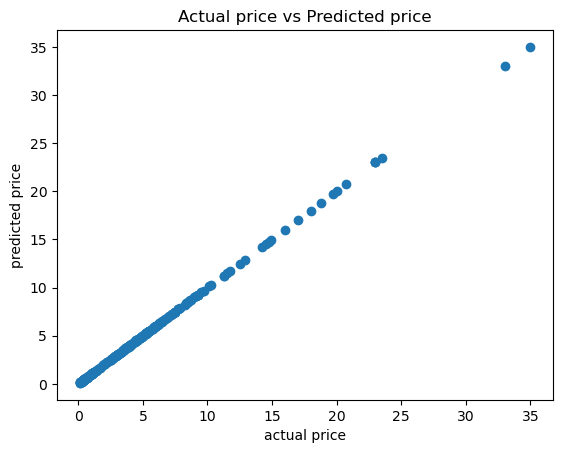

In [90]:
plt.scatter(y_train,training_data_prediciton)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('Actual price vs Predicted price')
plt.show()

In [91]:
testing_data_prediction=model3.predict(X_test)
print(testing_data_prediction)

[10.411847    0.47653195  3.7455857   3.1673048   9.480879    4.785826
  3.220186    6.0440536   0.20580018  5.7460895   7.8345094   4.3484526
  0.42552215  8.710355    2.8063934   0.8093238   0.68575203  0.40518174
 10.467861    4.0324397   1.3322725   9.1053295   0.38967785  9.824587
  0.49546686  6.9997854   0.7759463   0.28484     3.0905352   2.3772857
  0.46574718]


In [92]:
#R square error
score_1=metrics.r2_score(y_test,testing_data_prediction)
#Mean absolute error
score_2=metrics.mean_absolute_error(y_test,testing_data_prediction)
print('R square error:',score_1)
print('Mean absolute error:',score_2)

R square error: 0.9739216554116775
Mean absolute error: 0.38865974157087263


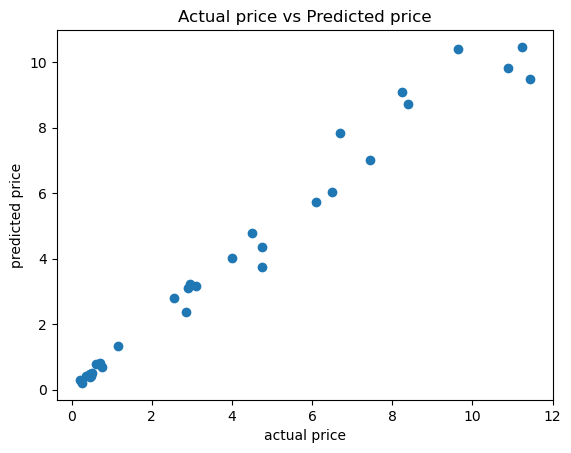

In [94]:
plt.scatter(y_test,testing_data_prediction)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('Actual price vs Predicted price')
plt.show()